In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('job_no_exp.csv')

In [ ]:
df.head()

,Unnamed: 0,Title,Location,Salary,Company,Descriptions
0,1,business analyst,Remote,100.00,Sabot Consulting,sabot consulting sabot is a management consu...
1,3,data engineer,"Remote in Minneapolis-Saint Paul, MN",48.08,Longevity Holdings Inc.,position data engineer location mn as a data...
2,4,other,"Wichita, KS 67219",28.85,WKI Kenworth,full job description the network administrator...
3,15,other,"Hartford, CT 06152 (Frog Hollow area)",74.93,Cigna,job description do you have a passion for mach...
4,52,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",64.90,GfK,who we are mrisimmons research is a leading c...


In [ ]:
# Function to extract state code from the address
def extract_state(address):
    # Split the address by comma and whitespace
    parts = address.split(', ')
    if len(parts) > 1:
        # Split the state and ZIP code
        state_zip = parts[1].split(' ')
        if len(state_zip) > 1 and len(state_zip[0]) == 2:
            # Return the state code
            return state_zip[0]
    # Return an empty string if state code is not found
    return ''

# Apply the function to the "location" column and create a new "state" column
df['state'] = df['Location'].apply(extract_state)

In [ ]:
df.head()

,Unnamed: 0,Title,Location,Salary,Company,Descriptions,state
0,1,business analyst,Remote,100.00,Sabot Consulting,sabot consulting sabot is a management consu...,
1,3,data engineer,"Remote in Minneapolis-Saint Paul, MN",48.08,Longevity Holdings Inc.,position data engineer location mn as a data...,
2,4,other,"Wichita, KS 67219",28.85,WKI Kenworth,full job description the network administrator...,KS
3,15,other,"Hartford, CT 06152 (Frog Hollow area)",74.93,Cigna,job description do you have a passion for mach...,CT
4,52,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",64.90,GfK,who we are mrisimmons research is a leading c...,NY


In [ ]:
df['Salary'] = df['Salary'] * 2080

In [ ]:
df.head()

,Unnamed: 0,Title,Location,Salary,Company,Descriptions,state
0,1,business analyst,Remote,208000.0,Sabot Consulting,sabot consulting sabot is a management consu...,
1,3,data engineer,"Remote in Minneapolis-Saint Paul, MN",100006.4,Longevity Holdings Inc.,position data engineer location mn as a data...,
2,4,other,"Wichita, KS 67219",60008.0,WKI Kenworth,full job description the network administrator...,KS
3,15,other,"Hartford, CT 06152 (Frog Hollow area)",155854.4,Cigna,job description do you have a passion for mach...,CT
4,52,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY


In [ ]:
# Drop rows where 'other' appears in the 'Title' column
df = df[df['Title'] != 'other']

df.head()

,Unnamed: 0,Title,Location,Salary,Company,Descriptions,state
0,1,business analyst,Remote,208000.0,Sabot Consulting,sabot consulting sabot is a management consu...,
1,3,data engineer,"Remote in Minneapolis-Saint Paul, MN",100006.4,Longevity Holdings Inc.,position data engineer location mn as a data...,
4,52,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY
5,52,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY
6,27,data engineer,+8 locationsRemote,94993.6,Pepsico,compensation k k benefits medical dental...,


In [ ]:
# Drop the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,Title,Location,Salary,Company,Descriptions,state
0,business analyst,Remote,208000.0,Sabot Consulting,sabot consulting sabot is a management consu...,
1,data engineer,"Remote in Minneapolis-Saint Paul, MN",100006.4,Longevity Holdings Inc.,position data engineer location mn as a data...,
4,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY
5,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY
6,data engineer,+8 locationsRemote,94993.6,Pepsico,compensation k k benefits medical dental...,


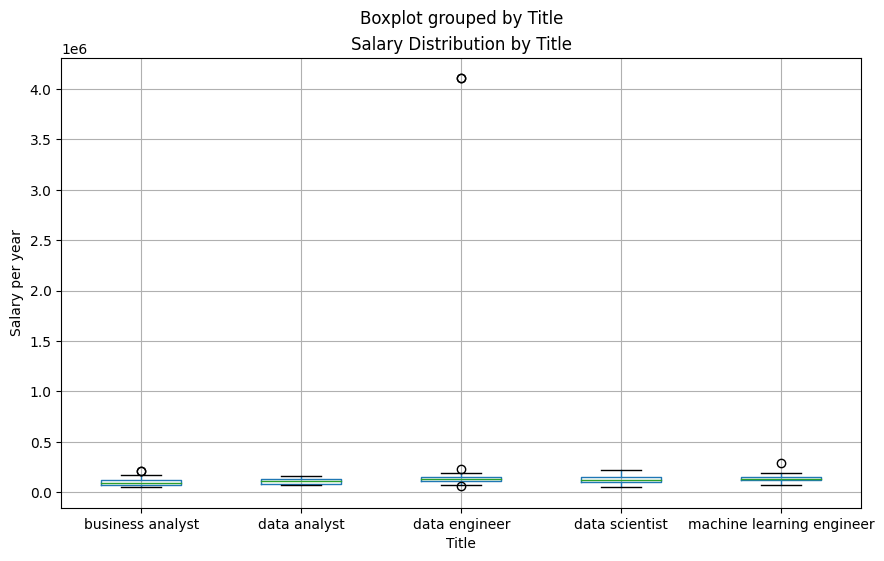

In [ ]:
import matplotlib.pyplot as plt
# Create a box plot for each title
df.boxplot(column='Salary', by='Title', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Salary Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Salary per year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=360)

# Display the plot
plt.show()

In [ ]:
# Calculate the IQR for the 'Salary per year' column
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
df_filtered = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# Print the filtered DataFrame
print(df_filtered)

                         Title  \
0             business analyst   
1                data engineer   
4    machine learning engineer   
5    machine learning engineer   
6                data engineer   
..                         ...   
365              data engineer   
366  machine learning engineer   
367               data analyst   
369  machine learning engineer   
370             data scientist   

                                             Location    Salary  \
0                                              Remote  208000.0   
1                Remote in Minneapolis-Saint Paul, MN  100006.4   
4      Hybrid remote in New York, NY 10281+1 location  134992.0   
5      Hybrid remote in New York, NY 10281+1 location  134992.0   
6                                  +8 locationsRemote   94993.6   
..                                                ...       ...   
365                                            Remote  112507.2   
366                                            Remote  

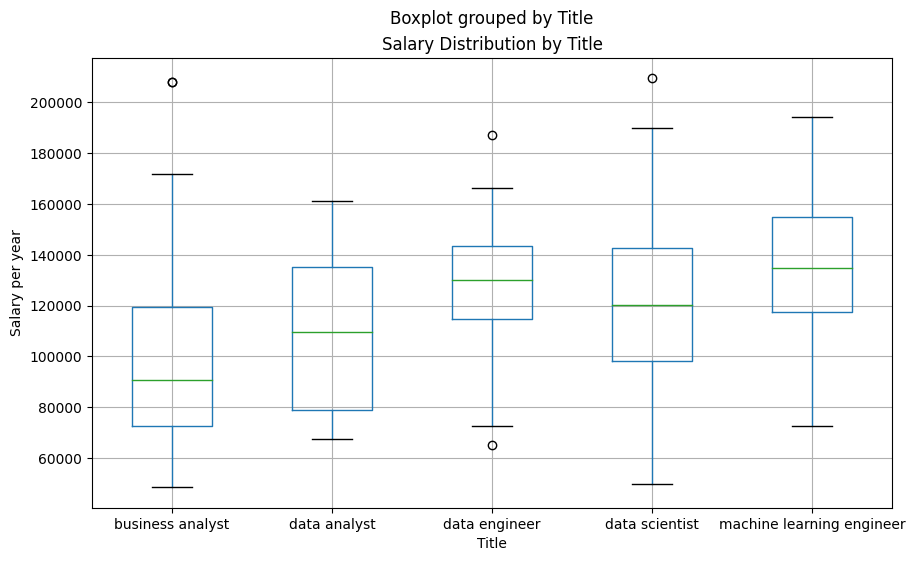

In [ ]:
df_filtered.boxplot(column='Salary', by='Title', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Salary Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Salary per year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=360)

# Display the plot
plt.show()

In [ ]:
# Calculate the average salary for each title
df2 = df_filtered.groupby('Title')['Salary'].mean().reset_index()

# Rename the column to "Average Salary"
df2.rename(columns={'Salary per year': 'Average Salary'}, inplace=True)

# Print the new DataFrame
df2.head()

,Title,Salary
0,business analyst,100274.571429
1,data analyst,109142.714754
2,data engineer,128792.358209
3,data scientist,121552.987234
4,machine learning engineer,138590.862222


In [ ]:
# Remove decimals from 'Salary' column
df2['Salary'] = df2['Salary'].round(0).astype(int)

# Display the updated DataFrame
print(df2)

                       Title  Salary
0           business analyst  100275
1               data analyst  109143
2              data engineer  128792
3             data scientist  121553
4  machine learning engineer  138591


In [ ]:
# df2.to_csv('avg_salary.csv', index=False)

In [ ]:
df2.to_json('data.json', orient='records')

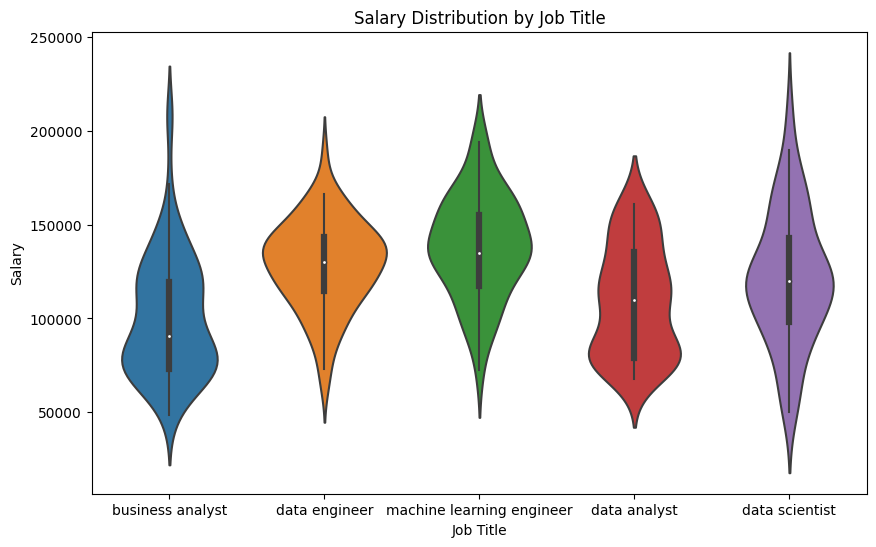

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data with the relevant columns
subset_data = df_filtered[['Title', 'Salary']]

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Title', y='Salary', data=subset_data)
plt.xticks(rotation=360)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Title')
plt.show()


In [ ]:
df3 = df_filtered[['Salary', 'Title']]
df3.head()

,Salary,Title
0,208000.0,business analyst
1,100006.4,data engineer
4,134992.0,machine learning engineer
5,134992.0,machine learning engineer
6,94993.6,data engineer


In [ ]:
df3.to_csv('violin.csv', index=False)

In [ ]:
# Assuming your dataframe is named 'df'
df_filtered['Work Type'] = df_filtered['Location'].apply(lambda x: 'Remote' if 'Remote' in x else 'Onsite')

# Print the updated dataframe
print(df_filtered)

                         Title  \
0             business analyst   
1                data engineer   
4    machine learning engineer   
5    machine learning engineer   
6                data engineer   
..                         ...   
365              data engineer   
366  machine learning engineer   
367               data analyst   
369  machine learning engineer   
370             data scientist   

                                             Location    Salary  \
0                                              Remote  208000.0   
1                Remote in Minneapolis-Saint Paul, MN  100006.4   
4      Hybrid remote in New York, NY 10281+1 location  134992.0   
5      Hybrid remote in New York, NY 10281+1 location  134992.0   
6                                  +8 locationsRemote   94993.6   
..                                                ...       ...   
365                                            Remote  112507.2   
366                                            Remote  

<ipython-input-27-cc2cc2b51128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Work Type'] = df_filtered['Location'].apply(lambda x: 'Remote' if 'Remote' in x else 'Onsite')


In [ ]:
df_filtered.head()

,Title,Location,Salary,Company,Descriptions,state,Work Type
0,business analyst,Remote,208000.0,Sabot Consulting,sabot consulting sabot is a management consu...,,Remote
1,data engineer,"Remote in Minneapolis-Saint Paul, MN",100006.4,Longevity Holdings Inc.,position data engineer location mn as a data...,,Remote
4,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY,Onsite
5,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY,Onsite
6,data engineer,+8 locationsRemote,94993.6,Pepsico,compensation k k benefits medical dental...,,Remote


In [ ]:
# Create a dataframe for Remote work type
df_remote = df_filtered[df_filtered['Work Type'] == 'Remote']

# Create a dataframe for Onsite work type
df_onsite = df_filtered[df_filtered['Work Type'] == 'Onsite']

# Print the Remote dataframe
print("Remote Work Type:")
df_remote.head()


Remote Work Type:


,Title,Location,Salary,Company,Descriptions,state,Work Type
0,business analyst,Remote,208000.0,Sabot Consulting,sabot consulting sabot is a management consu...,,Remote
1,data engineer,"Remote in Minneapolis-Saint Paul, MN",100006.4,Longevity Holdings Inc.,position data engineer location mn as a data...,,Remote
6,data engineer,+8 locationsRemote,94993.6,Pepsico,compensation k k benefits medical dental...,,Remote
7,business analyst,+1 locationRemote,148720.0,Mastech Digital,job summary this role focuses on solving the ...,,Remote
8,business analyst,"Remote in San Antonio, TX",88004.8,Dworo.io,we are looking for a business analyst who will...,,Remote


In [ ]:
# Print the Onsite dataframe
print("Onsite Work Type:")
df_onsite.head()

Onsite Work Type:


,Title,Location,Salary,Company,Descriptions,state,Work Type
4,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY,Onsite
5,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY,Onsite
12,data analyst,"Oshkosh, WI",90480.0,Excelion Partners,qualifications lead large crossfunctional pro...,,Onsite
15,machine learning engineer,"Hybrid remote in New York, NY 10281+1 location",134992.0,GfK,who we are mrisimmons research is a leading c...,NY,Onsite
17,data scientist,"New York, NY",123240.0,The New York Times,the mission of the new york times is to seek t...,,Onsite


In [ ]:
remote = df_remote[['Salary', 'Title']]
remote.head()

,Salary,Title
0,208000.0,business analyst
1,100006.4,data engineer
6,94993.6,data engineer
7,148720.0,business analyst
8,88004.8,business analyst


In [ ]:
remote.to_csv('remote.csv', index=False)

In [ ]:
onsite = df_onsite[['Salary', 'Title']]
onsite.head()

,Salary,Title
4,134992.0,machine learning engineer
5,134992.0,machine learning engineer
12,90480.0,data analyst
15,134992.0,machine learning engineer
17,123240.0,data scientist


In [ ]:
onsite.to_csv('onsite.csv', index=False)

# With Different Dataset

In [2]:
df_new = pd.read_csv('data_locationtype.csv')

In [3]:
df_new.head()

,Unnamed: 0,Title,Company,Rating,Descriptions,Descriptions_clean,Salary,Location
0,1082,Others,Habitat for Humanity,4.2,The Database Coordinator is responsible for ma...,the database coordinator is responsible for ma...,33280.0,in-person
1,382,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
2,521,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
3,751,Business Analyst,Silverxis,3.5,Business Analyst\nBusiness Process Analyst wit...,business analyst business process analyst with...,36400.0,remote
4,1119,Data Engineer,BASF Corporation,3.9,JOB OVERVIEW\nProvides complex analysis to a b...,job overview provides complex analysis to a br...,41600.0,remote


In [4]:
# Drop the unnamed column
df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]

df_new.head()

,Title,Company,Rating,Descriptions,Descriptions_clean,Salary,Location
0,Others,Habitat for Humanity,4.2,The Database Coordinator is responsible for ma...,the database coordinator is responsible for ma...,33280.0,in-person
1,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
2,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
3,Business Analyst,Silverxis,3.5,Business Analyst\nBusiness Process Analyst wit...,business analyst business process analyst with...,36400.0,remote
4,Data Engineer,BASF Corporation,3.9,JOB OVERVIEW\nProvides complex analysis to a b...,job overview provides complex analysis to a br...,41600.0,remote


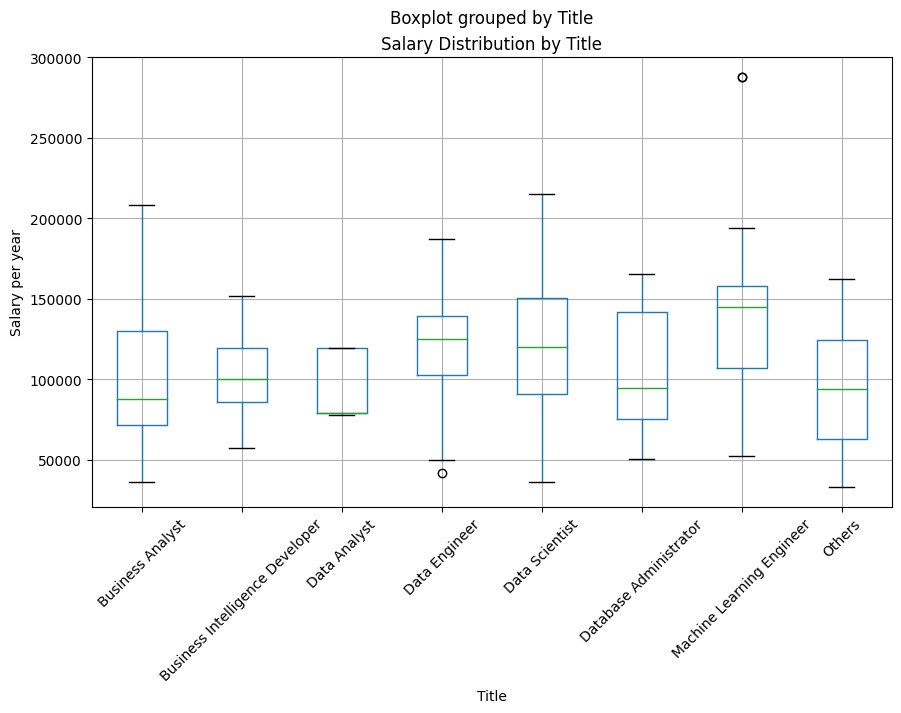

In [5]:
import matplotlib.pyplot as plt
# Create a box plot for each title
df_new.boxplot(column='Salary', by='Title', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Salary Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Salary per year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [6]:
# Calculate the IQR for the 'Salary per year' column
Q1 = df_new['Salary'].quantile(0.25)
Q3 = df_new['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
df_new_filtered = df_new[(df_new['Salary'] >= lower_bound) & (df_new['Salary'] <= upper_bound)]


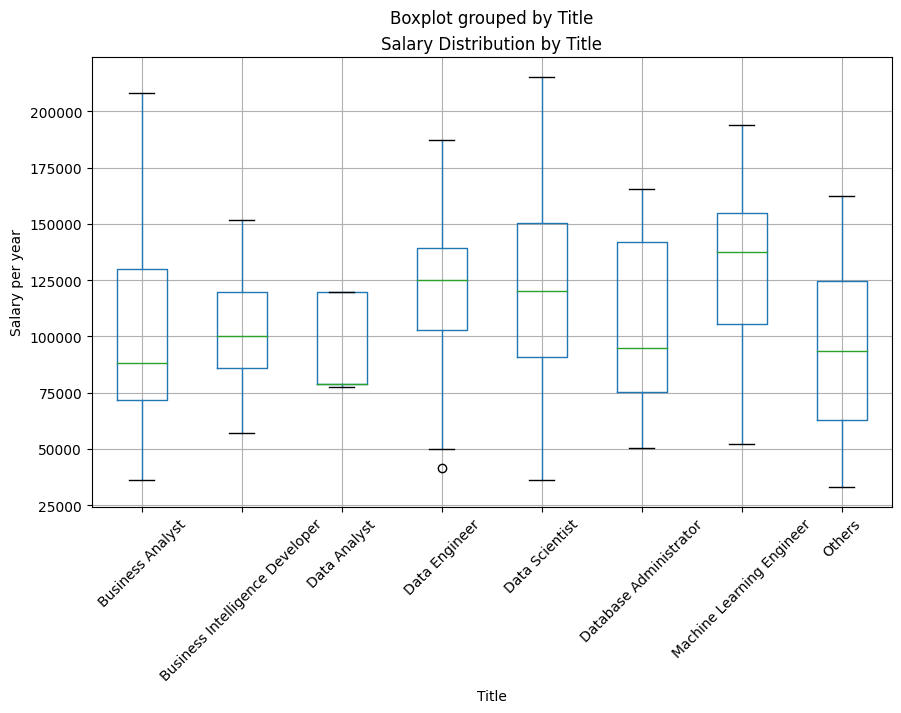

In [7]:
import matplotlib.pyplot as plt
# Create a box plot for each title
df_new_filtered.boxplot(column='Salary', by='Title', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Salary Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Salary per year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

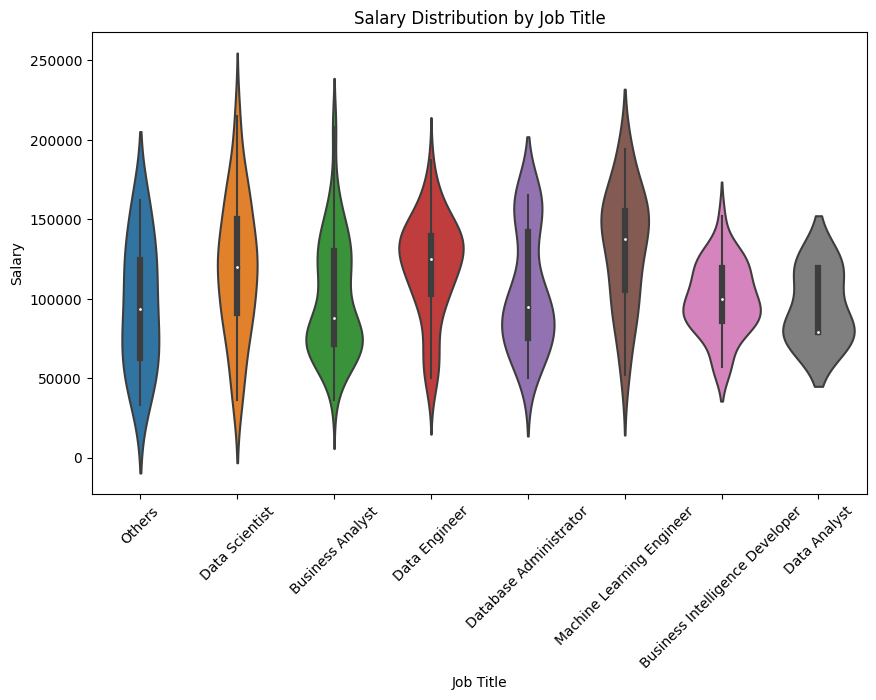

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data with the relevant columns
subset_data = df_new_filtered[['Title', 'Salary']]

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Title', y='Salary', data=subset_data)
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Title')
plt.show()


In [9]:
df_new_filtered.shape

(328, 7)

In [10]:
# Title counts
title_counts = df_new_filtered['Title'].value_counts()
print(title_counts)

Business Analyst                   77
Data Engineer                      74
Data Scientist                     49
Business Intelligence Developer    37
Database Administrator             34
Machine Learning Engineer          30
Others                             22
Data Analyst                        5
Name: Title, dtype: int64


In [11]:
# Replacing "others" to "Data Analyst"
df_new_filtered.loc[df_new_filtered['Title'] == 'Others', 'Title'] = 'Data Analyst'

In [12]:
# Title counts
title_counts1 = df_new_filtered['Title'].value_counts()
print(title_counts1)

Business Analyst                   77
Data Engineer                      74
Data Scientist                     49
Business Intelligence Developer    37
Database Administrator             34
Machine Learning Engineer          30
Data Analyst                       27
Name: Title, dtype: int64


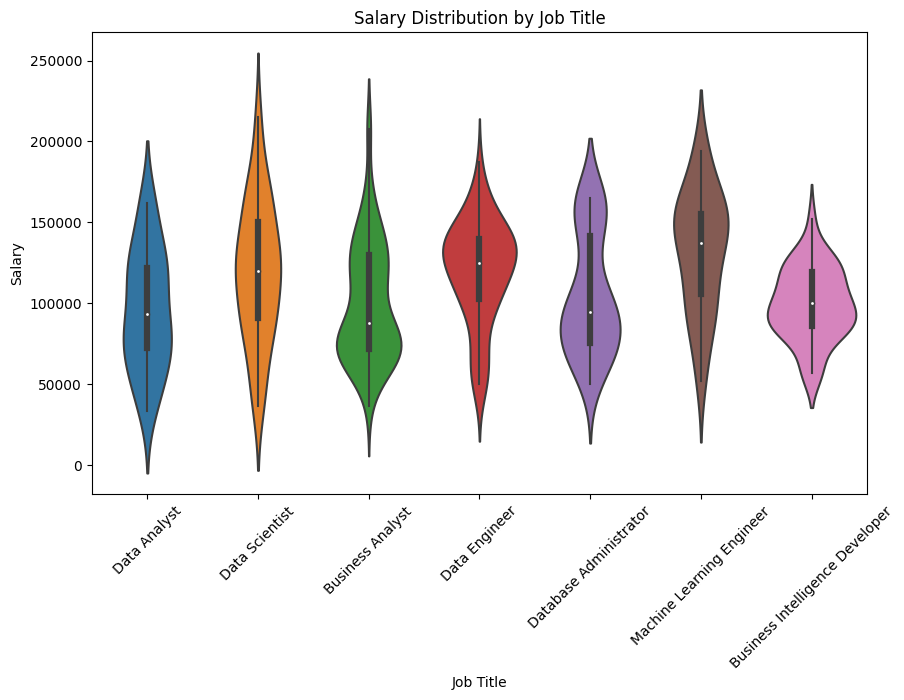

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data with the relevant columns
subset_data = df_new_filtered[['Title', 'Salary']]

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Title', y='Salary', data=subset_data)
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Title')
plt.show()


In [14]:
df_new_filtered.head()

,Title,Company,Rating,Descriptions,Descriptions_clean,Salary,Location
0,Data Analyst,Habitat for Humanity,4.2,The Database Coordinator is responsible for ma...,the database coordinator is responsible for ma...,33280.0,in-person
1,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
2,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
3,Business Analyst,Silverxis,3.5,Business Analyst\nBusiness Process Analyst wit...,business analyst business process analyst with...,36400.0,remote
4,Data Engineer,BASF Corporation,3.9,JOB OVERVIEW\nProvides complex analysis to a b...,job overview provides complex analysis to a br...,41600.0,remote


In [15]:
# Create a dataframe for Remote work type
df_remote = df_new_filtered[df_new_filtered['Location'] == 'remote']

# Create a dataframe for Onsite work type
df_inperson = df_new_filtered[df_new_filtered['Location'] == 'in-person']

# Print the Remote dataframe
print("Remote Work Type:")
df_remote.head()


Remote Work Type:


,Title,Company,Rating,Descriptions,Descriptions_clean,Salary,Location
3,Business Analyst,Silverxis,3.5,Business Analyst\nBusiness Process Analyst wit...,business analyst business process analyst with...,36400.0,remote
4,Data Engineer,BASF Corporation,3.9,JOB OVERVIEW\nProvides complex analysis to a b...,job overview provides complex analysis to a br...,41600.0,remote
9,Data Scientist,"Ursus, Inc.",4.9,JOB TITLE: Data Scientist - NLP\nLOCATION: Rem...,job title data scientist nlp location remot...,49920.0,remote
10,Data Engineer,Cloud Shift Technologies LLC,3.7,Title: Data engineer with data catalogue\nWork...,title data engineer with data catalogue work ...,49920.0,remote
12,Data Engineer,Vingsfire pvt ltd,3.7,"Skills required: Power BI, Cosmos + SQL experi...",skills required power bi cosmos sql experi...,52000.0,remote


In [16]:
df_inperson.head()

,Title,Company,Rating,Descriptions,Descriptions_clean,Salary,Location
0,Data Analyst,Habitat for Humanity,4.2,The Database Coordinator is responsible for ma...,the database coordinator is responsible for ma...,33280.0,in-person
1,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
2,Data Scientist,Apex Systems,3.7,Job#: 1289167\n\nJob Description:\nApex System...,job job description apex systems is seekin...,36400.0,in-person
5,Data Analyst,Itlize Global LLC,4.8,Itlize Global LLC is looking for entry-level P...,itlize global llc is looking for entrylevel py...,43264.0,in-person
6,Data Analyst,Itlize Global LLC,4.8,Itlize Global LLC is looking for entry-level P...,itlize global llc is looking for entrylevel py...,43264.0,in-person


In [17]:
remote = df_remote[['Salary', 'Title']]
remote.head()

,Salary,Title
3,36400.0,Business Analyst
4,41600.0,Data Engineer
9,49920.0,Data Scientist
10,49920.0,Data Engineer
12,52000.0,Data Engineer


In [21]:
remote.to_csv('remote.csv', index = False)

In [18]:
inperson = df_inperson[['Salary', 'Title']]
inperson.head()

,Salary,Title
0,33280.0,Data Analyst
1,36400.0,Data Scientist
2,36400.0,Data Scientist
5,43264.0,Data Analyst
6,43264.0,Data Analyst


In [24]:
inperson.to_csv('inperson.csv', index=False)

In [19]:
combined = df_new_filtered[['Salary', 'Title']]
combined.head()

,Salary,Title
0,33280.0,Data Analyst
1,36400.0,Data Scientist
2,36400.0,Data Scientist
3,36400.0,Business Analyst
4,41600.0,Data Engineer


In [29]:
combined.to_csv('combined.csv', index=False)

In [31]:
remote.shape

(199, 2)

In [32]:
inperson.shape

(110, 2)

In [33]:
combined.shape

(328, 2)

In [34]:
lowest_salary = combined['Salary'].min()

print("Lowest salary:", lowest_salary)

Lowest salary: 33280.0


In [35]:
max_salary = combined['Salary'].max()

print("Max salary:", max_salary)

Max salary: 215009.6


In [22]:
# Group the data by title and calculate the minimum and maximum salary
salary_stats = df_new_filtered.groupby('Title')['Salary'].agg(['min', 'max'])

# Print the minimum and maximum salary for each title
for title, stats in salary_stats.iterrows():
    print(f'Title: {title}')
    print(f'Minimum Salary: {stats["min"]}')
    print(f'Maximum Salary: {stats["max"]}')
    print('---------------------------')

Title: Business Analyst
Minimum Salary: 36400.0
Maximum Salary: 208000.0
---------------------------
Title: Business Intelligence Developer
Minimum Salary: 57200.0
Maximum Salary: 151840.0
---------------------------
Title: Data Analyst
Minimum Salary: 33280.0
Maximum Salary: 162240.0
---------------------------
Title: Data Engineer
Minimum Salary: 41600.0
Maximum Salary: 187200.0
---------------------------
Title: Data Scientist
Minimum Salary: 36400.0
Maximum Salary: 215009.6
---------------------------
Title: Database Administrator
Minimum Salary: 50211.2
Maximum Salary: 165360.0
---------------------------
Title: Machine Learning Engineer
Minimum Salary: 52000.0
Maximum Salary: 194105.6
---------------------------
